# Semantic Similarity

<div class="alert alert-info">

This tutorial is available as an IPython notebook at [Malaya/example/semantic-similarity](https://github.com/huseinzol05/Malaya/tree/master/example/semantic-similarity).
    
</div>

<div class="alert alert-info">

This module trained on both standard and local (included social media) language structures, so it is save to use for both.
    
</div>

<div class="alert alert-warning">

This interface deprecated, use HuggingFace interface instead.
    
</div>

In [1]:
import os

os.environ['CUDA_VISIBLE_DEVICES'] = ''
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'

In [2]:
import logging

logging.basicConfig(level=logging.INFO)

In [3]:
%%time
import malaya

CPU times: user 3.07 s, sys: 3.7 s, total: 6.77 s
Wall time: 2.18 s


/home/husein/dev/malaya/malaya/tokenizer.py:208: FutureWarning: Possible nested set at position 3372
  self.tok = re.compile(r'({})'.format('|'.join(pipeline)))
/home/husein/dev/malaya/malaya/tokenizer.py:208: FutureWarning: Possible nested set at position 3890
  self.tok = re.compile(r'({})'.format('|'.join(pipeline)))


In [4]:
import warnings
warnings.filterwarnings('default')

In [5]:
string1 = 'Pemuda mogok lapar desak kerajaan prihatin isu iklim'
string2 = 'Perbincangan isu pembalakan perlu babit kerajaan negeri'
string3 = 'kerajaan perlu kisah isu iklim, pemuda mogok lapar'
string4 = 'Kerajaan dicadang tubuh jawatankuasa khas tangani isu alam sekitar'

In [6]:
news1 = 'Tun Dr Mahathir Mohamad mengakui pembubaran Parlimen bagi membolehkan pilihan raya diadakan tidak sesuai dilaksanakan pada masa ini berikutan isu COVID-19'
tweet1 = 'DrM sembang pilihan raya tak boleh buat sebab COVID 19'

### List available Transformer models

In [7]:
malaya.similarity.semantic.available_transformer()

/home/husein/dev/malaya/malaya/similarity/semantic.py:111: DeprecationWarning: `malaya.similarity.semantic.available_transformer` is deprecated, use `malaya.similarity.semantic.available_huggingface` instead
  warnings.warn(
INFO:malaya.similarity.semantic:tested on matched dev set translated MNLI, https://huggingface.co/datasets/mesolitica/translated-MNLI


,Size (MB),Quantized Size (MB),macro precision,macro recall,macro f1-score
bert,423.4,111.0,0.88315,0.88656,0.88405
tiny-bert,56.6,15.0,0.87210,0.87546,0.87292
albert,48.3,12.8,0.87164,0.87146,0.87155
tiny-albert,21.9,6.0,0.82234,0.82383,0.82295
xlnet,448.7,119.0,0.80866,0.76775,0.77112
alxlnet,49.0,13.9,0.88756,0.88700,0.88727


### Load transformer model

```python
def transformer(model: str = 'bert', quantized: bool = False, **kwargs):
    """
    Load Transformer similarity model.

    Parameters
    ----------
    model: str, optional (default='bert')
        Check available models at `malaya.similarity.semantic.available_transformer()`.
    quantized: bool, optional (default=False)
        if True, will load 8-bit quantized model.
        Quantized model not necessary faster, totally depends on the machine.

    Returns
    -------
    result: model
        List of model classes:

        * if `bert` in model, will return `malaya.model.bert.SiameseBERT`.
        * if `xlnet` in model, will return `malaya.model.xlnet.SiameseXLNET`.
    """
```

In [8]:
model = malaya.similarity.semantic.transformer(model = 'alxlnet')

/home/husein/dev/malaya/malaya/similarity/semantic.py:200: DeprecationWarning: `malaya.similarity.semantic.transformer` is deprecated, use `malaya.similarity.semantic.huggingface` instead
  warnings.warn(
2022-11-02 21:38:42.447055: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-02 21:38:42.450637: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-11-02 21:38:42.450654: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: husein-MS-7D31
2022-11-02 21:38:42.450657: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: husein-MS-7D31
2022-11-02 21:38:42.450726: 

### Load Quantized model

To load 8-bit quantized model, simply pass `quantized = True`, default is `False`.

We can expect slightly accuracy drop from quantized model, and not necessary faster than normal 32-bit float model, totally depends on machine.

In [12]:
quantized_model = malaya.similarity.semantic.transformer(model = 'alxlnet', quantized = True)

#### predict batch of strings with probability

```python
def predict_proba(self, strings_left: List[str], strings_right: List[str]):
    """
    calculate similarity for two different batch of texts.

    Parameters
    ----------
    string_left : List[str]
    string_right : List[str]

    Returns
    -------
    result : List[float]
    """
```

you need to give list of left strings, and list of right strings.

first left string will compare will first right string and so on.

similarity model only supported `predict_proba`.

In [10]:
model.predict_proba([string1, string2, news1, news1], [string3, string4, tweet1, string1])

array([0.99337685, 0.01469913, 0.5436511 , 0.44653463], dtype=float32)

In [11]:
quantized_model.predict_proba([string1, string2, news1, news1], [string3, string4, tweet1, string1])

array([0.99733776, 0.00935277, 0.97150946, 0.7315555 ], dtype=float32)

### Vectorize

Let say you want to visualize sentences in lower dimension, you can use `model.vectorize`,

```python
def vectorize(self, strings: List[str]):
    """
    Vectorize list of strings.

    Parameters
    ----------
    strings : List[str]

    Returns
    -------
    result: np.array
    """
```

In [10]:
texts = [string1, string2, string3, string4, news1, tweet1]
r = quantized_model.vectorize(texts)

In [11]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

tsne = TSNE().fit_transform(r)
tsne.shape

(6, 2)

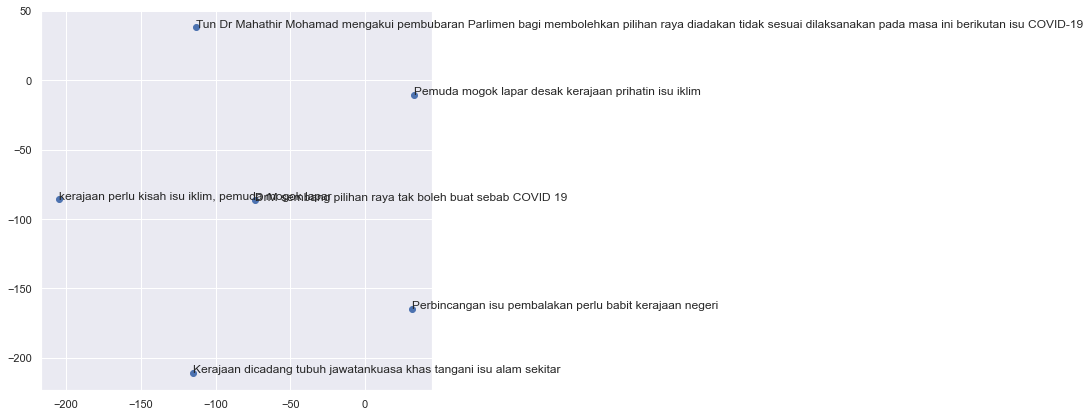

In [12]:
plt.figure(figsize = (7, 7))
plt.scatter(tsne[:, 0], tsne[:, 1])
labels = texts
for label, x, y in zip(
    labels, tsne[:, 0], tsne[:, 1]
):
    label = (
        '%s, %.3f' % (label[0], label[1])
        if isinstance(label, list)
        else label
    )
    plt.annotate(
        label,
        xy = (x, y),
        xytext = (0, 0),
        textcoords = 'offset points',
    )

### Stacking models

More information, you can read at https://malaya.readthedocs.io/en/latest/Stack.html

If you want to stack semantic similarity models, you need to pass labels using `strings_right` parameter,

```python
malaya.stack.predict_stack([model1, model2], List[str], strings_right = List[str])
```

We will passed `strings_right` as `**kwargs`.

In [13]:
alxlnet = malaya.similarity.transformer(model = 'alxlnet')
albert = malaya.similarity.transformer(model = 'albert')
tiny_bert = malaya.similarity.transformer(model = 'tiny-bert')

In [14]:
malaya.stack.predict_stack([alxlnet, albert, tiny_bert], [string1, string2, news1, news1], 
                           strings_right = [string3, string4, tweet1, string1])

array([0.9968965 , 0.17514098, 0.11507297, 0.01998391], dtype=float32)